# A note on quaternions and orientation of non-spherical particles

Kai Zhang, Department of Chemistry and Biochemistry, The University of Texas at Tyler, 2024

__References__:

[OVITO] https://www.ovito.org/manual/advanced_topics/aspherical_particles.html

[Spherical] https://spherical.readthedocs.io/en/main/QuaternionsAndRotations/

[Ben-Ari] A Tutorial on Euler Angles and Quaternions, https://raw.githubusercontent.com/motib/mathematics/master/quaternions/quaternion-tutorial.pdf


[Shoemake] Animating Rotation with Quaternion Curves,

## 1. Quaternions
\begin{align}
q = w + x i + y j + z k = [w,(x,y,z)] = [(x,y,z),w]
\end{align}
Here   $w$ always refers to  the real part of $q$, no matter at which location it is written in the 4-tuple.

## 2. Euler angles to quaternions

There are 12 ways to choose the three-axis sequence (e.g.  $xyz$) in the definition of Euler angles [Ben-Ari]. We use

* yaw around $z$ axis by $\phi$
* pitch around $y$ axis by $\theta$
* roll around $x$ axis by $\psi$

with corresponding quaternions [Shoemake]
\begin{align}
\begin{aligned}
q_x &= [\cos \frac{\psi}{2}, (\sin \frac{\psi}{2}, 0, 0) ] \\
q_y &= [\cos \frac{\theta}{2}, (0, \sin \frac{\theta}{2}, 0) ] \\
q_z &= [\cos \frac{\phi}{2}, (0,0, \sin \frac{\phi}{2}) ]
\end{aligned}
\end{align}

A general rotation $\phi \to \theta \to \psi$ has a quaternion $q = q_z q_y q_x$ with components [Shoemake]
\begin{align}
\begin{aligned}
w & = \cos \frac{\psi}{2} \cos \frac{\theta}{2} \cos \frac{\phi}{2} +  \sin \frac{\psi}{2} \sin \frac{\theta}{2} \sin \frac{\phi}{2} \\
x & = \sin \frac{\psi}{2} \cos \frac{\theta}{2} \cos \frac{\phi}{2} -  \cos \frac{\psi}{2} \sin \frac{\theta}{2} \sin \frac{\phi}{2} \\
y & = \cos \frac{\psi}{2} \sin \frac{\theta}{2} \cos \frac{\phi}{2} +  \sin \frac{\psi}{2} \cos \frac{\theta}{2} \sin \frac{\phi}{2} \\
z & = \cos \frac{\psi}{2} \cos \frac{\theta}{2} \sin \frac{\phi}{2} -  \sin \frac{\psi}{2} \sin \frac{\theta}{2} \cos \frac{\phi}{2}
\end{aligned}
\end{align}

##3.  Spherical coordinates orientation to quaternions

```python
import spherical
```

An orientation represented by the spherical coordiate $(\theta, \phi)$ can be mapped onto Eular angle rotations with $\psi =0$. The corresponding quaternion reduces to
\begin{align}
\begin{aligned}
w & = \cos \frac{\theta}{2} \cos \frac{\phi}{2} \\
x & =  -  \sin \frac{\theta}{2} \sin \frac{\phi}{2} \\
y & =\sin \frac{\theta}{2} \cos \frac{\phi}{2}  \\
z & =  \cos \frac{\theta}{2} \sin \frac{\phi}{2}
\end{aligned}
\end{align}

Examples:

* $(\theta, \phi) = (\frac{\pi}{2}, \pi) $ has $[w,x,y,z] = [0, -\frac{\sqrt{2}}{2}, 0, \frac{\sqrt{2}}{2}]$
* $(\theta, \phi) = (\frac{\pi}{2}, \frac{\pi}{2}) $ has $[w,x,y,z] = [0.5, -0.5, 0.5, 0.5]$

In [2]:
pip install spherical

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.6/55.6 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 784.8/784.8 kB 13.7 MB/s eta 0:00:00


In [3]:
import numpy as np
import spherical
import quaternionic
import matplotlib.pyplot as plt

In [12]:
for theta, phi in [(np.pi/2, np.pi),(np.pi/2, np.pi/2),(np.pi, np.pi/2),(np.pi/4, np.pi/4)]:
  Q =quaternionic.array.from_spherical_coordinates(theta, phi)
  print('theta,phi:', theta, phi, 'q:', Q.w, Q.x, Q.y, Q.z)

theta,phi: 1.5707963267948966 3.141592653589793 q: 4.329780281177467e-17 -0.7071067811865475 4.329780281177466e-17 0.7071067811865476
theta,phi: 1.5707963267948966 1.5707963267948966 q: 0.5000000000000001 -0.4999999999999999 0.5 0.5
theta,phi: 3.141592653589793 1.5707963267948966 q: 4.329780281177467e-17 -0.7071067811865475 0.7071067811865476 4.329780281177466e-17
theta,phi: 0.7853981633974483 0.7853981633974483 q: 0.8535533905932737 -0.14644660940672624 0.3535533905932738 0.3535533905932738


## 4. Creating OVITO .xyz configuration files of non-spherical particles with orientation specified by spherical coordinates/quaternions

```python
import spherical
import quaternionic

L = 10 # cubic box length
N = 250 # number of particles
a, b, c = 0.1, 0.1, 0.6 # large number indicates elongated direction

# x,y,z are arrays of length N storing the x,y,z coordinates of each particle
# theta, phi are arrays of length N storing spherical coordinates of each particle
Q = quaternionic.array.from_spherical_coordinates(theta, phi) # shape [N, 4]
with open('configs.xyz', 'a') as fp:
  fp.write('{}\n'.format(N))
  fp.write('Lattice="{} 0 0 0 {} 0 0 0 {}" Properties=species:S:1:pos:R:3:aspherical_shape:R:3:orientation:R:4\n'.format(L, L, L))
  for i in range(N):
    fp.write('C {} {} {} {} {} {} {} {} {} {}\n'.format(x[i],y[i],z[i],a,b,c,Q[i].x,Q[i].y,Q[i].z,Q[i].w))   
fp.close()
```

### Example xyz file 'nonspherical.xyz' and its visualization in OVITO

```text
4
Lattice="2 0 0 0 2 0 0 0 2" Properties=species:S:1:pos:R:3:aspherical_shape:R:3:orientation:R:4
C 0 0 0 0.1 0.1 0.6 -0.7071067811865475 0 0.7071067811865475 0
N 0 0 1 0.1 0.1 0.6 -0.5 0.5 0.5 0.5
O 0 1 0 0.1 0.1 0.6 -0.7071067811865475 0.7071067811865475 0 0
S 1 0 0 0.1 0.1 0.6 -0.14644660940672624 0.3535533905932738 0.3535533905932738 0.8535533905932737
```


In [14]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
filename = '/content/drive/My Drive/Colab Notebooks/nonspherical.npy'
img_array = np.load(filename)

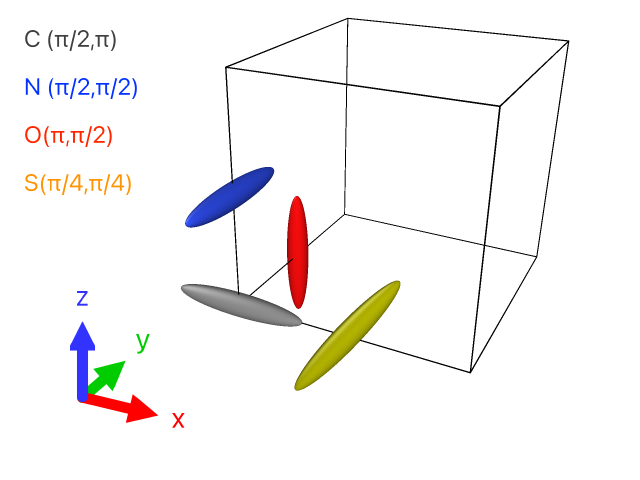

In [16]:
from PIL import Image
img_show = Image.fromarray(img_array)
img_show